Building a churn predictor from the Bank dataset.

In [267]:
import seaborn as sns
import pandas as pd
import numpy as np

#Load the dataset and explore the variables.

In [268]:
ds = pd.read_csv('customer_churn.csv')

How is the dataset?

In [269]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [270]:
# To understand the data

In [271]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [272]:
ds.shape

(7043, 21)

Cleaning and Wrangling of the dataset

In [273]:
ds.describe(include = "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9500-IWPXQ,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [274]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [275]:
cols = []
for i in range(len(ds.columns)):
    cols.append(ds.columns[i].lower().replace(' ','_'))
ds.columns = cols
print(ds.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [276]:
ds.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [277]:
ds.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [278]:
ds.select_dtypes(float)

,monthlycharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [279]:
len(ds)

7043

In [280]:
ds.select_dtypes(object)

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [281]:
ds.select_dtypes(int)

""
0
1
2
3
4
...
7038
7039
7040
7041


Cleaning Dataset

In [282]:
# check for multicollinearity

In [283]:
import matplotlib .pyplot as plt
import seaborn as sns


In [284]:
corr_matrix = ds.corr()


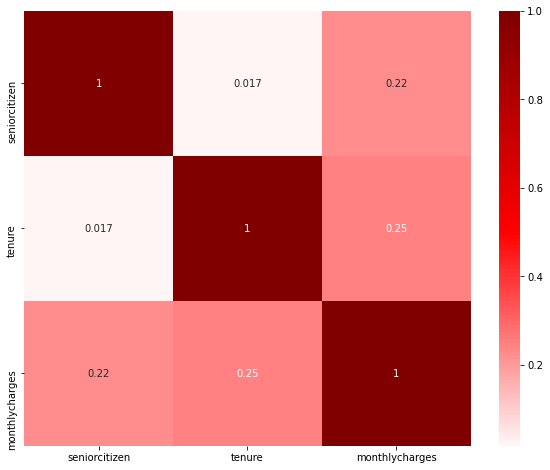

In [285]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,
           cmap='seismic',
           center=0,
           annot=True,
           );


C:\Users\JKM\Downloads\miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


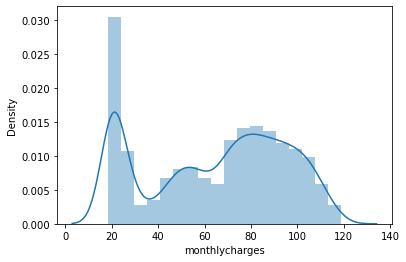

In [286]:
sns.distplot(ds['monthlycharges'])
plt.show()

In [287]:
ds['monthlycharges'].describe()


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

C:\Users\JKM\Downloads\miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


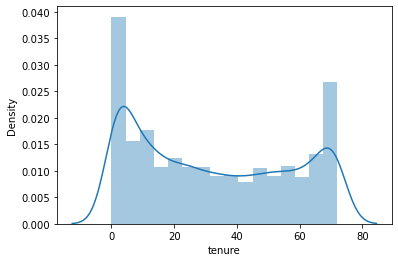

In [288]:
sns.distplot(ds['tenure'])
plt.show()

In [289]:
ds['tenure'].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

C:\Users\JKM\Downloads\miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


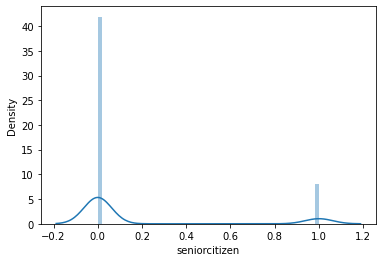

In [297]:
sns.distplot(ds['seniorcitizen'])
plt.show()

In [298]:
ds['seniorcitizen'].describe()


count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: seniorcitizen, dtype: float64

Processing

In [299]:
# Labeling of the Categorical columns

In [300]:
cols_cat = list(ds.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = ds[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", ds = my_data).set_title(col.upper())
    plt.figure()
    print


Frequency analysis of column:  customerid


ValueError: Could not interpret input 'customerid'

In [265]:
cat = ds.select_dtypes(include = np.object)
for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = ds[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", ds = my_data).set_title(col.upper())
    plt.figure()
    


Frequency analysis of column:  customerID


KeyError: 'customerID'

In [219]:
import numpy as np
from sklearn.preprocessing import Normalizer

X = ds.select_dtypes(include = np.number)


In [220]:
X.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [221]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)


In [222]:
x = pd.DataFrame(x_normalized, columns=X.columns)


In [223]:
x

,seniorcitizen,tenure,monthlycharges
0,0.00000,0.033482,0.999439
1,0.00000,0.512610,0.858622
2,0.00000,0.037115,0.999311
3,0.00000,0.728628,0.684910
4,0.00000,0.028277,0.999600
...,...,...,...
7038,0.00000,0.272322,0.962206
7039,0.00000,0.572182,0.820127
7040,0.00000,0.348346,0.937366
7041,0.01342,0.053681,0.998468


In [224]:
ds

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [301]:
categorical = pd.get_dummies(cat, drop_first=True, columns=['customerid','gender', 'partner', 'dependents', 'phoneservice' , 'multiplelines','internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport' , 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod','churn'])


In [306]:
X.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [307]:
categorical.head

<bound method NDFrame.head of      totalcharges  customerid_0003-MKNFE  customerid_0004-TLHLJ  \
0           29.85                      0                      0   
1          1889.5                      0                      0   
2          108.15                      0                      0   
3         1840.75                      0                      0   
4          151.65                      0                      0   
...           ...                    ...                    ...   
7038       1990.5                      0                      0   
7039       7362.9                      0                      0   
7040       346.45                      0                      0   
7041        306.6                      0                      0   
7042       6844.5                      0                      0   

      customerid_0011-IGKFF  customerid_0013-EXCHZ  customerid_0013-MHZWF  \
0                         0                      0                      0   
1          

In [304]:
categorical['churn_Yes'].value_counts()


0    5174
1    1869
Name: churn_Yes, dtype: int64

In [305]:
#sort out the categoricals 
y= categorical['churn_Yes']
categorical=categorical.drop(['churn_Yes'], axis=1)
categorical


,totalcharges,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,customerid_0013-SMEOE,customerid_0014-BMAQU,customerid_0015-UOCOJ,customerid_0016-QLJIS,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,29.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1889.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,108.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1840.75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,151.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.5,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
7039,7362.9,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,346.45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,306.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [308]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((x_normalized, categorical),axis=1)


In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [310]:
#apply model

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)


In [318]:
import sklearn.linear_model as sk
logreg = sk.LogisticRegressionCV()
logreg.fit(predictor_var,outcome_var)

NameError: name 'predictor_var' is not defined

In [315]:
classification = logisticregression(random_state =0, solve ='lbfgs', max_iter = 400, multi_class = 'over').fit(X_train, y_train)

NameError: name 'logisticregression' is not defined

In [ ]:
# Not Complete.(To be Continued...